<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/Copy_of_Clustering2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 150):
        partitions.append((words[i:i+150], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of different genre
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:S
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 150 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [143]:
random_sentences_with_book_name()

Data saved to book_partitions.csv.


In [144]:
data=pd.read_csv('book_partitions.csv')

In [145]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-145-f510ee5b3d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]=1
<ipython-input-145-f510ee5b3d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]=2
<ipython-input-145-f510ee5b3d00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][600:800]=3
<ipython-input-145-f510ee5b3d00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [146]:
data

,Text,Book Name,Author,label
0,any decent man s blanket I thought so All r...,Moby Dick,Herman Melville,0
1,ever cruised on the Line began the Englishma...,Moby Dick,Herman Melville,0
2,shunning Fedallah and then settling his firm ...,Moby Dick,Herman Melville,0
3,Blast him now that I think of it he s alway...,Moby Dick,Herman Melville,0
4,enemy s ship But at this critical instant a s...,Moby Dick,Herman Melville,0
...,...,...,...,...
995,vp he rose don d his clothes dupt the cham...,The Tragedie of Hamlet,William Shakespeare,4
996,I will not speake with her Hor She is importu...,The Tragedie of Hamlet,William Shakespeare,4
997,with more offences at my becke then I haue th...,The Tragedie of Hamlet,William Shakespeare,4
998,vnhatcht vnfledg d Comrade Beware Of entranc...,The Tragedie of Hamlet,William Shakespeare,4


In [150]:
# ploting word cloud for the most frequent 20 words in each book  
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px


for label in data['label'].unique():
  books = data[data["label"]==label]["Text"]


# Creating  word cloud
  wc = wordcloud.WordCloud(background_color=None, max_words=20, 
                          max_font_size=100)
  wc = wc.generate(str(books))

# Converting  word cloud to dataframe
  words = list(wc.words_.keys())
  freq = [wc.words_[word] for word in words]
  data10 = {'words': words, 'freq': freq}
  df10 = pd.DataFrame(data10)

  # Creating  interactive word cloud
  fig = px.scatter(df10, x='words', y='freq', text='words', size='freq', color='freq')
  fig.update_layout(title='Interactive Word Cloud',
                    xaxis_title='Words',
                    yaxis_title='Frequency')
  fig.show()

#

In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [74]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Clustered data points for X_train

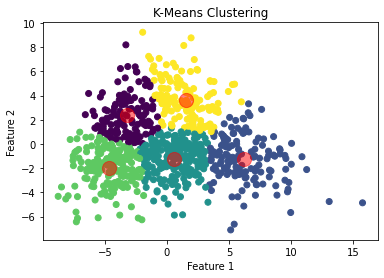

In [76]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

Unclustered Raw datapoints of data

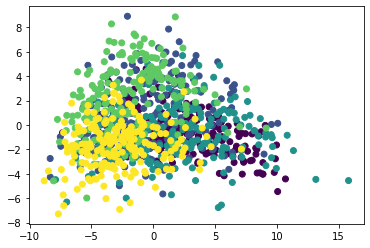

In [77]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

Clustered data points for X_test

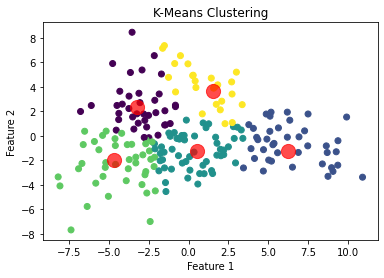

In [78]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [79]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)

In [80]:
silhouette

0.374081282323083

In [81]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
kappa

-0.053123539492132554

In [82]:
from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)

print("Coherence:", ari)

Coherence: 0.125250758422194


#EM (GAUSSIAN MIXTURE ) 

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

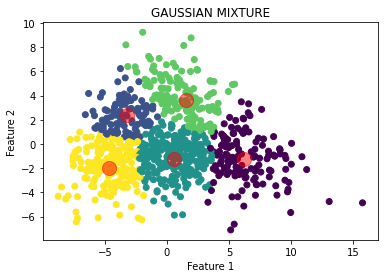

In [84]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

====UNCLUSTERED RAW DATA====


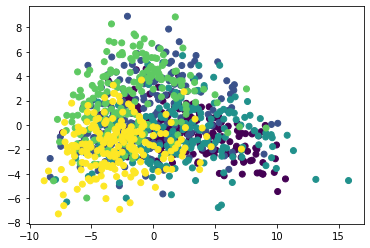

In [85]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


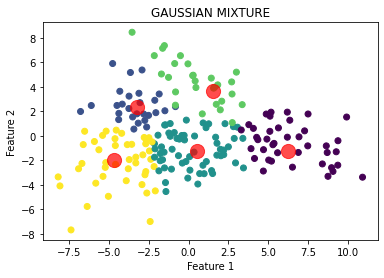

In [86]:
 print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

In [87]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for EM with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for EM with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for EM with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for EM with Bag of words is  0.3740824576031671
_________________________________________________________________________
kappa for EM with Bag of words is  0.2716406760668597
_________________________________________________________________________
Coherence for EM with Bag of words is: 0.1188344988094464
_________________________________________________________________________


#Heirarchial with Bag of words 


In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

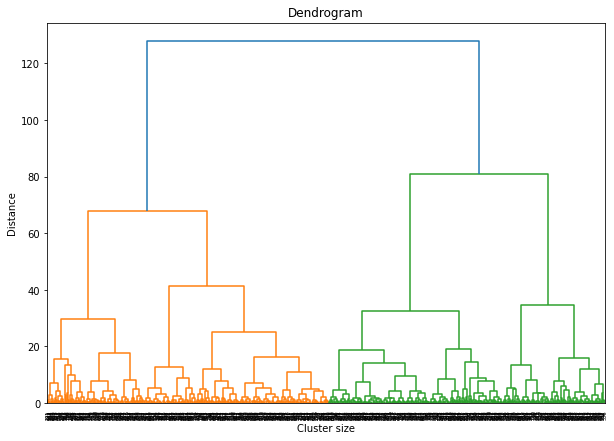

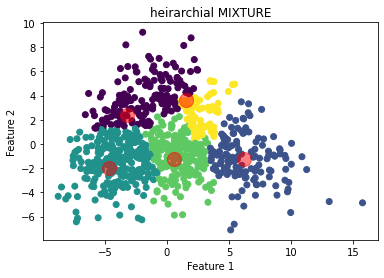

In [89]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)

# Print cluster labels
labels = agg.labels_

print("==============================================================================================")


# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial MIXTURE")
plt.show()

====TEST DATA CLUSTER====


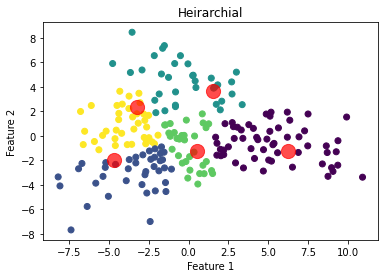

In [90]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

In [91]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Bag of words is  0.33500988296809536
_________________________________________________________________________
kappa for Heirarchial with Bag of words is  0.06530408773678975
_________________________________________________________________________
Coherence for Heirarchial with Bag of words is: 0.15618705316806672
_________________________________________________________________________


#TF-IDF k-means


In [92]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [93]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

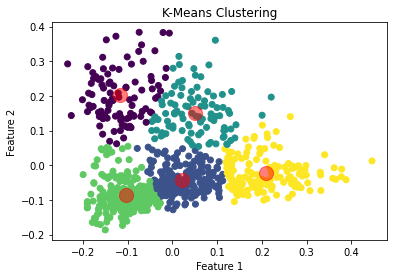

In [95]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

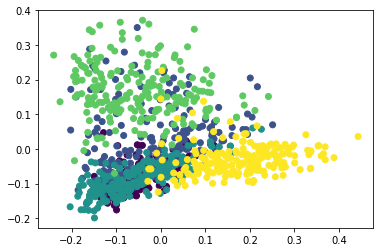

In [96]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

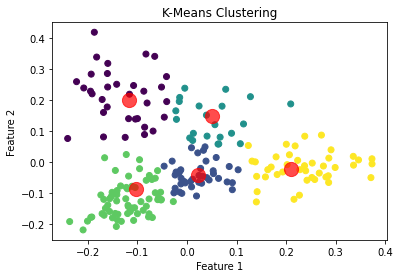

In [97]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [123]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMEANS with TFIDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMEANS with TFIDF is ",kappa )
kktdf = kappa
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMEANS with TFIDF is:", ari)
print("_________________________________________________________________________")

Silhouette for KMEANS with TFIDF is  0.4296182531822489
_________________________________________________________________________
kappa for KMEANS with TFIDF is  0.009284067543149144
_________________________________________________________________________
Coherence for KMEANS with TFIDF is: 0.3282359766260536
_________________________________________________________________________


#tfidf gmm


In [152]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

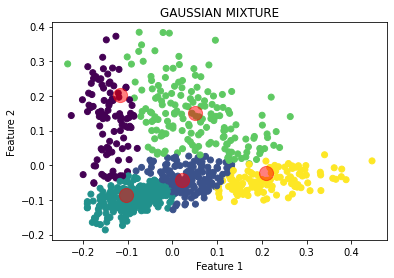

In [154]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

====UNCLUSTERED RAW DATA====


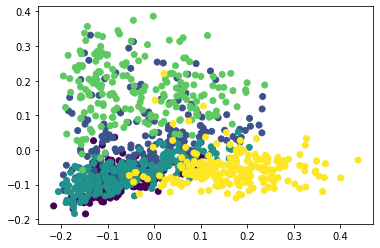

In [155]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


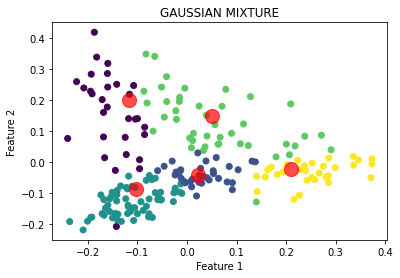

In [156]:
 print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

In [157]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for GMM with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for GMM with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for GMM with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for GMM with Bag of words is  0.42961539853532105
_________________________________________________________________________
kappa for GMM with Bag of words is  0.34528448947778645
_________________________________________________________________________
Coherence for GMM with Bag of words is: 0.29986747164275
_________________________________________________________________________


#TFIDF HEIRARCHIAL 


In [158]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

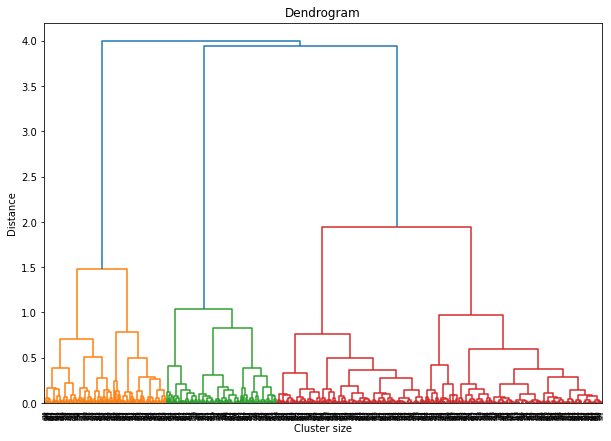

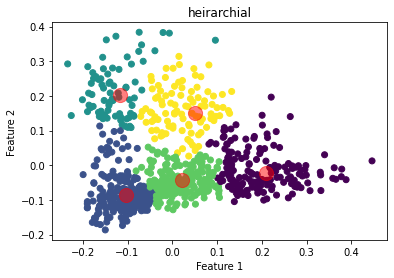

In [160]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)

# Print cluster labels
labels = agg.labels_

print("==============================================================================================")


# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial")
plt.show()

In [108]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Bag of words is  0.4048047934554384
_________________________________________________________________________
kappa for Heirarchial with Bag of words is  0.009284067543149144
_________________________________________________________________________
Coherence for Heirarchial with Bag of words is: 0.3282359766260536
_________________________________________________________________________


#word2vec

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

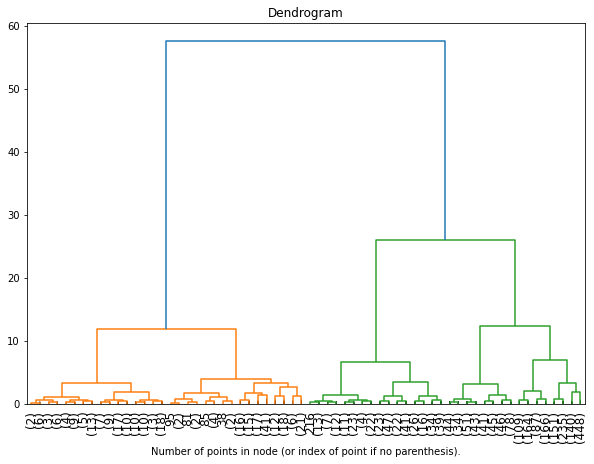

ValueError: ignored

In [178]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Preprocess the data
sentences = [sent.split() for sent in df['Text']]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Create the word vectors
word_vectors = model.wv.vectors

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(word_vectors)

# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(word_vectors)

# Run Hierarchical clustering algorithm
linkage_matrix = linkage(word_vectors, method='ward')
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(word_vectors)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Calculate coherence
coherence_kmeans = silhouette_score(word_vectors, kmeans.labels_)
coherence_gmm = silhouette_score(word_vectors, gmm.predict(word_vectors))
coherence_agg = silhouette_score(word_vectors, agg.labels_)

# Calculate kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(word_vectors))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculate silhouette
silhouette_kmeans = silhouette_score(word_vectors, kmeans.labels_)
silhouette_gmm = silhouette_score(word_vectors, gmm.predict(word_vectors))
silhouette_agg = silhouette_score(word_vectors, agg.labels_)

# Print the results
print("Coherence K-means:", coherence_kmeans)
print("Coherence GMM:", coherence_gmm)
print("Coherence Hierarchical:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means:", kappa_kmeans)
print("Kappa GMM:", kappa_gmm)
print("Kappa Hierarchical:", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means:", silhouette_kmeans)
print("Silhouette GMM:", silhouette_gmm)
print("Silhouette Hierarchical:", silhouette_agg)
print("______________________________________________________________________________________")




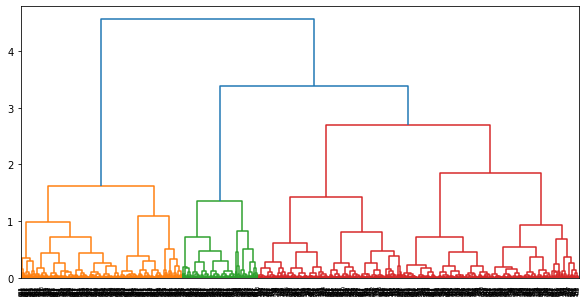

ValueError: ignored

In [177]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("book_partitions.csv")



# Train word2vec model
sentences = [doc.split() for doc in data["Text"]]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Get document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

# Cluster with k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)
kmeans_labels = kmeans.labels_

# Cluster with Gaussian mixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(X_pca_train)
gmm_labels = gmm.predict(X_pca_train)

# Cluster with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()



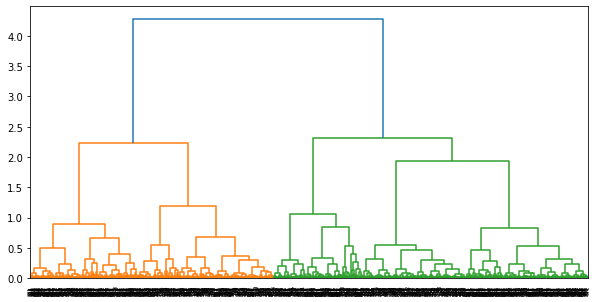

In [120]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("book_partitions.csv")



# Train word2vec model
sentences = [doc.split() for doc in data["Text"]]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Get document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

# Cluster with k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(doc_vectors)
kmeans_labels = kmeans.labels_

# Cluster with Gaussian mixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(doc_vectors)
gmm_labels = gmm.predict(doc_vectors)

# Cluster with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [161]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  0.4048026978077732
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  0.34528448947778645
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.29986747164275
_________________________________________________________________________


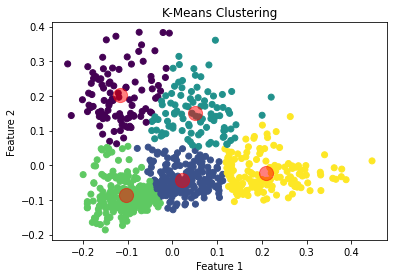

In [122]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

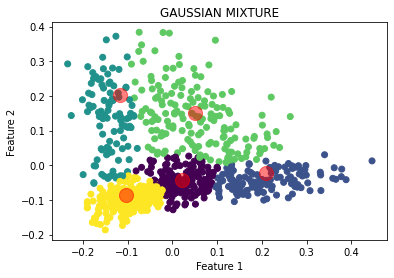

In [113]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

#LDA 

In [114]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

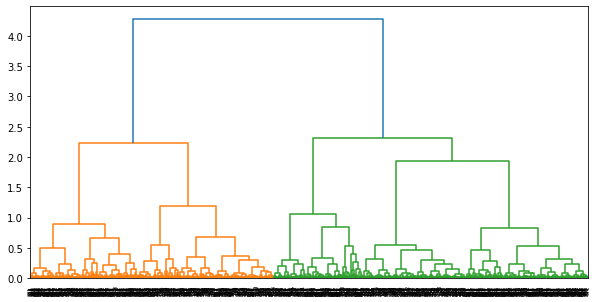

In [135]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Convert the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transform to topics
topics = lda.transform(bow)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)

# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Run Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)

# Cluster with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()





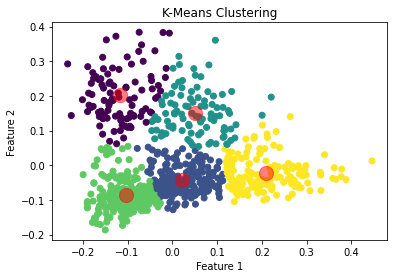

In [136]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

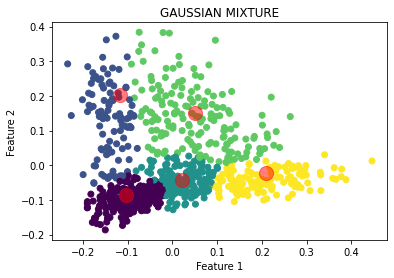

In [118]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

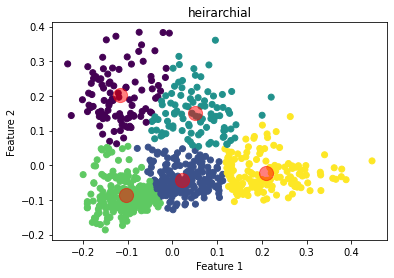

In [119]:
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial")
plt.show()

In [132]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  0.6594107242218911
_________________________________________________________________________
kappa for Heirarchial with Bag of words is  0.009284067543149144
_________________________________________________________________________
Coherence for Heirarchial with Bag of words is: 0.3282359766260536
_________________________________________________________________________


In [168]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Coherence K-means with LDA: 0.6273284666762727
Coherence GMM with LDA: 0.2565190144052948
Coherence Hierarchical with LDA: 0.5994312836717866
______________________________________________________________________________________
Kappa K-means with LDA: -0.21750000000000003
Kappa GMM with LDA: -0.18999999999999995
Kappa Hierarchical with LDA : 0.09250000000000003
______________________________________________________________________________________
Silhouette K-means with LDA: 0.6273284666762727
Silhouette GMM with LDA: 0.2565190144052948
Silhouette Hierarchical with LDA: 0.5994312836717866
______________________________________________________________________________________


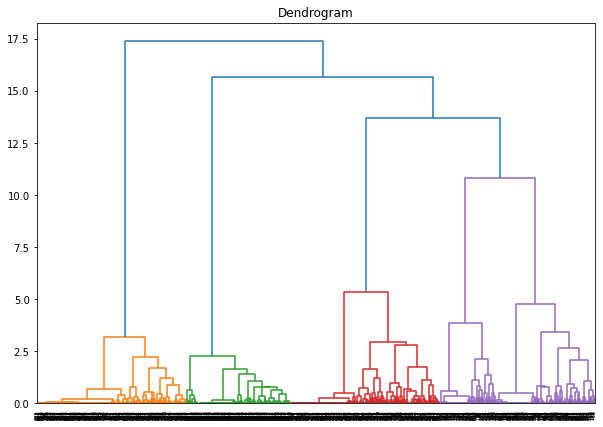

In [179]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Convert the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transform to topics
topics = lda.transform(bow)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)

# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Run Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(topics, method='ward'))

# Calculate coherence
coherence_kmeans = silhouette_score(topics, kmeans.labels_)
coherence_gmm = silhouette_score(topics, gmm.predict(topics))
coherence_agg = silhouette_score(topics, agg.labels_)

# Calculate kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(topics))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculate silhouette
silhouette_kmeans = silhouette_score(topics, kmeans.labels_)
silhouette_gmm = silhouette_score(topics, gmm.predict(topics))
silhouette_agg = silhouette_score(topics, agg.labels_)

# Print the results
print("Coherence K-means with LDA:", coherence_kmeans)
print("Coherence GMM with LDA:", coherence_gmm)
print("Coherence Hierarchical with LDA:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means with LDA:", kappa_kmeans)
print("Kappa GMM with LDA:", kappa_gmm)
print("Kappa Hierarchical with LDA :", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means with LDA:", silhouette_kmeans)
print("Silhouette GMM with LDA:", silhouette_gmm)
print("Silhouette Hierarchical with LDA:", silhouette_agg)
print("______________________________________________________________________________________")




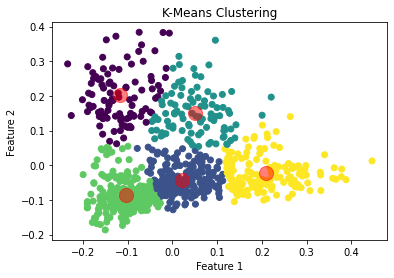

In [169]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

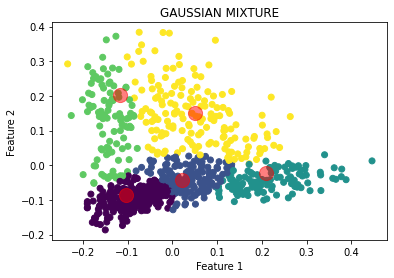

In [170]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

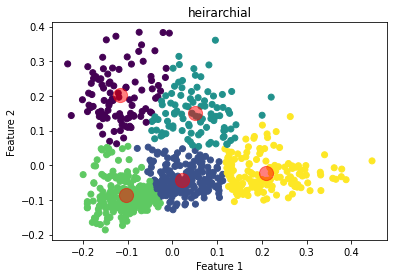

In [171]:
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial")
plt.show()